# Commuters and Epidemics
Commuter data is often used in spatial modelling of epidemics as the flux (or to fit the flux) between patches.
What are the consequences of this? People don't just commute. Here I fit commuter data to parts of a d-EPR model based in the UK, using ONLY commuters (so people who aren't commuters don't exist). I then run an epidemic simulation on both commuter-based data and d-EPR based data (which includes commuters non-commuting trips) to see the difference.

Considering only the commuting population is needed to avoid much hassle of choosing what individuals in the d-EPR model are commuters. It's hoped that there will still be a difference, even when just considering commuters.

## Data
Information about data sources can be found in `commuter_data` folder.

In [20]:
import pandas as pd
import numpy as np
from scipy.sparse import coo_array
import matplotlib.pyplot as plt

In [36]:
## Data
commuter_matrix = pd.read_csv("commuter_data/commuter_matrix.csv", index_col=0)
distance_matrix = pd.read_csv("commuter_data/centroid_distances.csv", index_col=0)
num_of_patches = len(commuter_matrix)
patch_ids = commuter_matrix.index.values

(363, 363)

## Distance kernel
Compile a global distance kernel

In [12]:
max_distance = distance_matrix.values.max()

In [25]:
global_kernel = np.zeros(max_distance+1)
for i in patch_ids:
    for j in patch_ids:
        if i == j:
            continue
        distance = distance_matrix.loc[i, j]
        flux = commuter_matrix.loc[i, j]
        global_kernel[distance] += flux

/var/folders/rw/bnfc8gsn7pbbrw8dc7r76x740000gn/T/ipykernel_90998/4101616700.py:2: RuntimeWarning: divide by zero encountered in log
  plt.scatter(prob_range[0:100], np.log(prob[:100]), s=1)


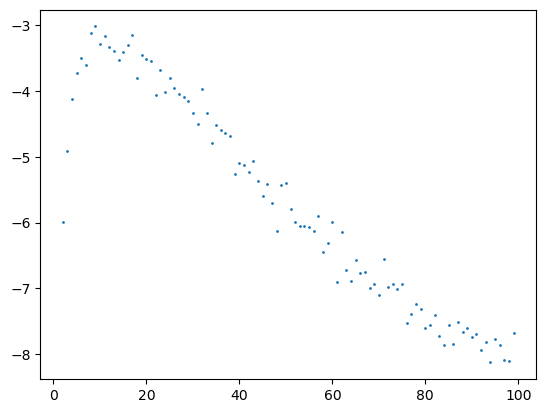

In [35]:
prob_range, prob = np.arange(max_distance+1), global_kernel/global_kernel.sum()
plt.scatter(prob_range[0:100], np.log(prob[:100]), s=1)
plt.show()

In [ ]:
xclass Commuters:
    def __init__(self):